**Credit Card Fraud Detection**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import joblib


In [3]:
train_path = '/content/fraudTrain.csv'
test_path = '/content/fraudTest.csv'

fraud_train = pd.read_csv(train_path)
fraud_test = pd.read_csv(test_path)

In [4]:
fraud_data = pd.concat([fraud_train, fraud_test], axis=0)  #unifying

In [5]:
print("Dataset Overview:")
print(fraud_data.info())
print(fraud_data.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fra

In [6]:
#drrop unnecessary columns
fraud_data.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street',
                 'city', 'state', 'zip', 'dob', 'unix_time', 'merch_lat', 'merch_long'], axis=1, inplace=True)

In [7]:
print("\nMissing Values:")
print(fraud_data.isnull().sum())


Missing Values:
merchant     0
category     0
amt          0
gender       0
lat          0
long         0
city_pop     0
job          0
trans_num    0
is_fraud     0
dtype: int64


In [8]:
#handling missing values

print("Missing Values Before Imputation:")
print(fraud_data.isnull().sum())

categorical_features = ['merchant', 'category', 'gender', 'job']
for feature in categorical_features:
    fraud_data[feature].fillna(fraud_data[feature].mode()[0], inplace=True)

numerical_features = ['amt', 'lat', 'long', 'city_pop']
for feature in numerical_features:
    fraud_data[feature].fillna(fraud_data[feature].median(), inplace=True)

fraud_data.dropna(subset=['is_fraud'], inplace=True)

print("\nMissing Values After Imputation:")
print(fraud_data.isnull().sum())


Missing Values Before Imputation:
merchant     0
category     0
amt          0
gender       0
lat          0
long         0
city_pop     0
job          0
trans_num    0
is_fraud     0
dtype: int64


<ipython-input-8-d8eeeb1f180b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fraud_data[feature].fillna(fraud_data[feature].mode()[0], inplace=True)
<ipython-input-8-d8eeeb1f180b>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in


Missing Values After Imputation:
merchant     0
category     0
amt          0
gender       0
lat          0
long         0
city_pop     0
job          0
trans_num    0
is_fraud     0
dtype: int64


**EDA**

<ipython-input-9-2afd9116109c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=fraud_data, palette='coolwarm')


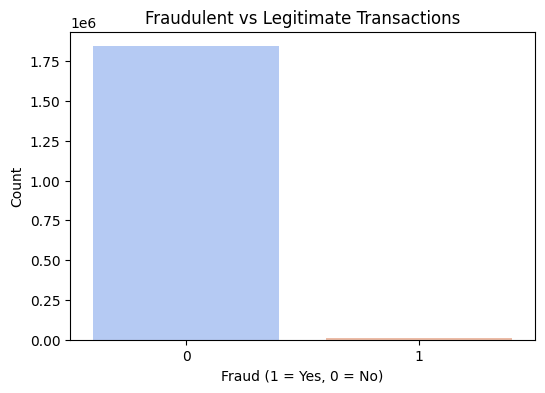

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=fraud_data, palette='coolwarm')
plt.title("Fraudulent vs Legitimate Transactions")
plt.xlabel("Fraud (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


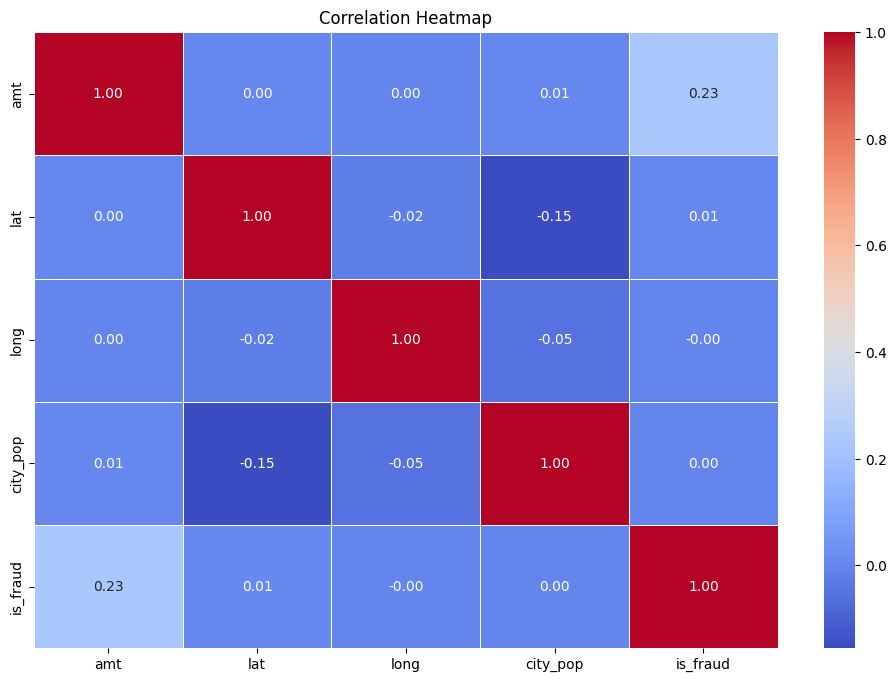

In [11]:
plt.figure(figsize=(12, 8))
numerical_features = fraud_data.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
encoder = LabelEncoder()
fraud_data['category'] = encoder.fit_transform(fraud_data['category'])
fraud_data['gender'] = encoder.fit_transform(fraud_data['gender'])

In [11]:
X = fraud_data.drop('is_fraud', axis=1)
y = fraud_data['is_fraud']
# seaprate target and feature

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
# scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'fraud_Streich, Hansen and Veum'

In [ ]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the encoded dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Scale only numerical columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Data scaling and encoding completed successfully.")
